In [25]:
# The following imports are needed for the following figures and tables
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [26]:
# We red the data from the file path and display the data 
geno_data = pd.read_csv("./data/brandvain_et_al_2014_snp_mat.csv")

### Data
This is a 14000 rows by 19 columns data. The different columns represent the different genotypes that we are comparing in order to identify signs of introgression or pressence of gene flow. Currently, our rows represent the different segregation site and the columns represent the different individuals for the population for Mimulus nasutus and Mimulus guttatus.

In [27]:
# Original data which is a site by individual matrix
geno_data

,NHN26,KootN,YJS6G,AHQT1G,CAC9N,CAC6G,SF5N,DUNG,MAR3G,BOG10G,SWBG,REM8G,LMC24G,SLP9G,DPRN,DPRG,PED5G,IM62.JGI,Mdent
0,0,0,0.0,0,0,0,0.0,1.0,1.0,NaN,NaN,1.0,0.0,0,0,0,1.0,0.0,NaN
1,1,1,0.0,0,1,0,1.0,1.0,1.0,NaN,NaN,NaN,0.0,0,1,0,1.0,0.0,1.0
2,0,0,NaN,0,0,0,0.0,1.0,NaN,NaN,0.0,0.0,0.0,0,0,0,1.0,0.0,0.0
3,1,1,NaN,0,1,0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,1,1,0,1.0,0.0,1.0
4,0,0,0.0,1,0,0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0,0,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,NaN,0.0,0.0
13996,1,1,1.0,0,1,1,1.0,0.0,0.0,NaN,0.0,NaN,0.0,0,1,0,1.0,0.0,1.0
13997,1,1,0.0,0,1,1,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1,1,1,1.0,0.0,1.0
13998,1,1,1.0,0,1,1,1.0,0.0,1.0,1.0,1.0,1.0,NaN,1,1,1,1.0,0.0,NaN


### Performing PCA
The goal of the PCA is to simplify a complex dataset by reducing the dimension of it. This results into a more intepretable and efficient data where you can idenfity features such as population strutuce. The first axis of the PCA represents the maximum variation of the dataset and the second axis which is orthogonal to the first represent the second most variation. In a way, the second axis makes the data into a more tangible state. 

#### Steps For PCA In Allele Frequency Data
1. First, we need to prepare our dataset. As of now, it is a site by inidividual. For the sake of efficiency, it is better for the the rows to be the SNP sites and the columns to be individuals, so therefore we need to transpose the dataset.


In [28]:
# We take the transpose of the geno_data
geno_data_transposed = np.transpose(geno_data)
geno_data_transposed

,0,1,2,3,4,5,6,7,8,9,...,13990,13991,13992,13993,13994,13995,13996,13997,13998,13999
NHN26,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
KootN,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
YJS6G,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
AHQT1G,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAC9N,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
CAC6G,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
SF5N,0.0,1.0,0.0,1.0,0.0,1.0,0.0,NaN,1.0,NaN,...,NaN,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
DUNG,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MAR3G,1.0,1.0,NaN,1.0,0.0,NaN,0.0,0.0,NaN,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
BOG10G,NaN,NaN,NaN,0.0,1.0,1.0,NaN,1.0,1.0,1.0,...,1.0,NaN,1.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0


2. Next, we need to convert this into a numerical dataset where we can actually do Principle Component Analysis. However, in addition to converting it to a numpy array, we also need to scale it by a factor of two because the individuals are a diploid and when we multiply by 2 we can compute further steps that define the allele frequency of that site denoted as 0 or 1.

In [29]:
# Convert the DataFrame in to a C_matrix, we have to multiply by 2 in order to consider the diploidity
c_matrix = geno_data_transposed.to_numpy() * 2
# Remove the outgroup 
c_matrix = c_matrix[:-1]
c_matrix

array([[ 0.,  2.,  0., ...,  2.,  2.,  2.],
       [ 0.,  2.,  0., ...,  2.,  2.,  2.],
       [ 0.,  0., nan, ...,  0.,  2.,  2.],
       ...,
       [ 0.,  0.,  0., ...,  2.,  2.,  2.],
       [ 2.,  2.,  2., ...,  2.,  2.,  2.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

3. Now we have to normalize our data, to do this we need to calculate our column mean, but notice that there appears to be a "nan" in our matrix indicating unavailable data. Hence, we need to calculate the column mean excluding the nan.

In [30]:
# Simplify the C_matrix before standardizing it and we need to calculate the column mean vector
col_mean_vector = np.nanmean(c_matrix, axis=0)
col_mean_vector

array([0.5       , 1.06666667, 0.26666667, ..., 1.44444444, 1.64705882,
       1.5       ])

In [31]:
# After calclating the column mean vector, we need to calculate the column allele frequency vector. 
# Note that we divide by 2 given the ancestral and derived allele.
col_allele_freq = col_mean_vector / 2
col_allele_freq

array([0.25      , 0.53333333, 0.13333333, ..., 0.72222222, 0.82352941,
       0.75      ])

In [32]:
# We want to find relevant data in this matrix because the PCA should only consider the maximum varational data set without any noises (homozygous).
cond_1 = (col_allele_freq == 1)
cond_2 = (col_allele_freq == 0)
cond_3 = (col_allele_freq == (1 / c_matrix.shape[0] * 2))
useful_index = np.where(~(cond_1 | cond_2 | cond_3))[0]
useful_index

array([    0,     1,     2, ..., 13997, 13998, 13999])

4. With the available terms and varaibles, we can now find the covariance between the two individuals that we are comparing. The formula in use will be denoted where the top represents the allele count matrix subtracted by the column mean divided by the standard deviation: 

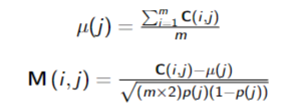

In [33]:
# Calculate the standard deviation for an allele frequency
standard_deviation = np.sqrt(((c_matrix.shape[0] * 2) * col_allele_freq[useful_index] * (1 - col_allele_freq[useful_index])))
standard_deviation



array([2.59807621, 2.99332591, 2.03960781, ..., 2.68741925, 2.28732025,
       2.59807621])

In [34]:
# After computing the standard deviation we follow the equation and subtract and divide
m_matrix = (c_matrix[:, useful_index] - col_mean_vector[useful_index]) / standard_deviation
m_matrix[np.isnan(m_matrix)] = 0
m_matrix

array([[-0.19245009,  0.31180478, -0.13074409, ...,  0.20672456,
         0.15430335,  0.19245009],
       [-0.19245009,  0.31180478, -0.13074409, ...,  0.20672456,
         0.15430335,  0.19245009],
       [-0.19245009, -0.35634832,  0.        , ..., -0.53748385,
         0.15430335,  0.19245009],
       ...,
       [-0.19245009, -0.35634832, -0.13074409, ...,  0.20672456,
         0.15430335,  0.19245009],
       [ 0.57735027,  0.31180478,  0.84983659, ...,  0.20672456,
         0.15430335,  0.19245009],
       [-0.19245009, -0.35634832, -0.13074409, ..., -0.53748385,
        -0.7200823 , -0.57735027]])

5. After computing the M matrix, we need to compute the covariance: This will give us a matrix that  measures the degree of correlation between the allele frequencies at each pair of genetic markers.

In [35]:
# Computing covariance
x_matrix = np.dot(m_matrix, m_matrix.T) / (m_matrix.shape[0] - 1)
print(x_matrix)
print("X Matrix Shape:",  x_matrix.shape)

[[ 4.45402253e+01  3.15263952e+01 -1.36475569e+01 -2.21364711e+01
   2.99579204e+01 -8.39833828e+00  2.46412003e+01 -1.75022647e+01
  -2.06563249e+01 -1.51967414e+01 -1.23490027e+01 -8.12718751e+00
  -6.06566293e+00 -7.52283535e+00  2.98222915e+01 -5.30570979e+00
  -7.91664193e+00 -1.56632952e+01]
 [ 3.15263952e+01  4.32681584e+01 -1.29692088e+01 -2.21923352e+01
   3.13115298e+01 -8.00721455e+00  2.72990349e+01 -1.78620925e+01
  -2.14771588e+01 -1.55357961e+01 -1.27127579e+01 -8.33015116e+00
  -6.08987338e+00 -8.93516984e+00  3.17016132e+01 -6.14778225e+00
  -8.42178276e+00 -1.64254083e+01]
 [-1.36475569e+01 -1.29692088e+01  7.65715845e+01  1.27402150e+01
  -1.33108787e+01  1.45823831e-01 -1.15185390e+01 -5.01607629e+00
   4.30791738e+00  6.41476504e+00 -5.35786016e+00 -5.96817610e+00
  -4.30072811e+00 -7.69802723e+00 -1.30392454e+01 -1.05140330e+01
  -5.10835317e-01  3.67085924e+00]
 [-2.21364711e+01 -2.21923352e+01  1.27402150e+01  1.20563752e+02
  -2.27279969e+01  1.07235831e+01 -1.

6. Next we need to calculate the principle component of the x_matrix (covariance). In order to do this, we need to perform the eigendecomposition to compute the eigenvalues and eigenvectors from the covariance matrix.

In [36]:
# Compute the eigen -values and -vectors.
eig_vals, eig_vecs = np.linalg.eig(x_matrix)
# Sort the -values and -vectors.
eig_idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[eig_idx]
eig_vecs = eig_vecs[:, eig_idx]
print("Eigen Value Shape:", eig_vals.shape)
print("Eigen Vectors Shape:", eig_vecs.shape)

Eigen Value Shape: (18,)
Eigen Vectors Shape: (18, 18)


7. Lastly we can now visualize our data with matplot:

Mimulus nasutus
- ind 0: NHN26
- ind 1: KootN
- ind 4: CAC9N
- ind 6: SF5N
- ind 14: DPRN

Mimulus guttatus.
- ind 2: YSJ6G (Northern)
- ind 3: AHQT1G (Northern)
- ind 5: CAC6G (Northern)
- ind 7: DUNG (Southern)
- ind 8: MAR3G (Northern)
- ind 9: BOG10G (Northern)
- ind 10: SWBG (Southern
- ind 11: REMBG (Southern)
- ind 12: LMC24G (Southern)
- ind 13: SLP9G (Southern)
- ind 15: DPRG (Southern)
- ind 16: PED5G (Southern)
- ind 17: IM62_JGI (Northern)

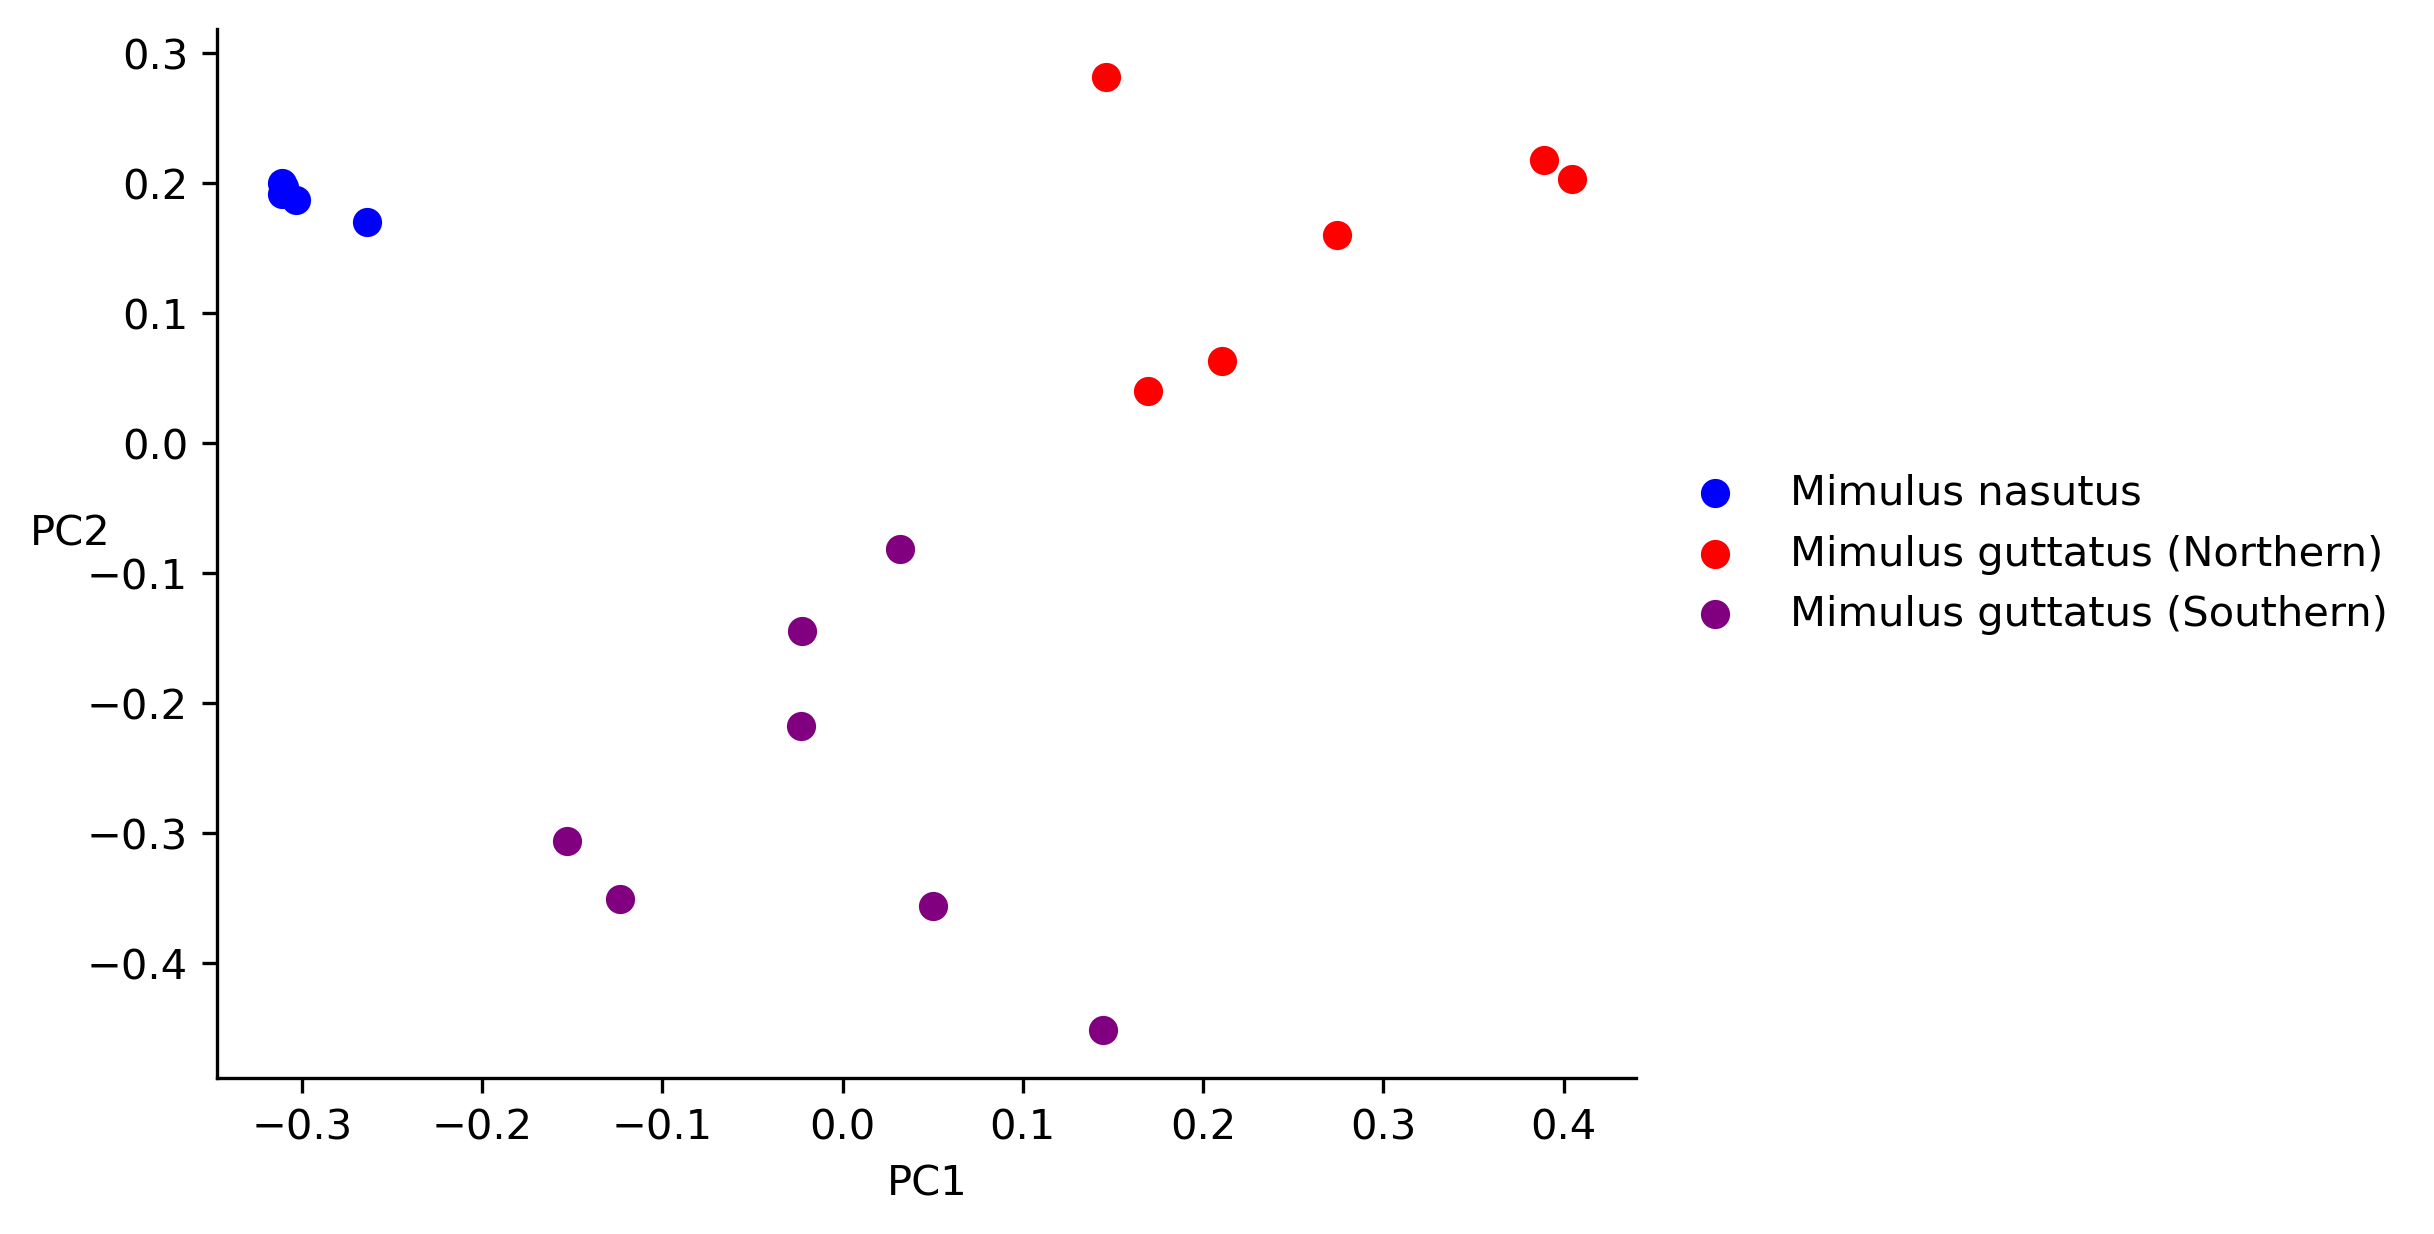

In [37]:
# Makes the figure
fig = plt.figure(figsize=(8, 4), constrained_layout=True, dpi=300)
# Intialize the axes.
ax = fig.add_subplot(111)
# Plot the analytical solutions.
# THE FIRST SPLIT FOR MIMULUS NASUTUS
ax.scatter(
    eig_vecs[0:2, 0], eig_vecs[0:2, 1],
    color='blue', label='Mimulus nasutus',
)
ax.scatter(
    eig_vecs[4, 0], eig_vecs[4, 1],
    color='blue')
ax.scatter(
    eig_vecs[6, 0], eig_vecs[6, 1],
    color='blue')
ax.scatter(
    eig_vecs[14, 0], eig_vecs[14, 1],
    color='blue')
#-------------------------------------------------------------------
# THE SECOND SPLIT FOR MIMULUS GUTTATUS NORTHERN
ax.scatter(
    eig_vecs[2:4, 0], eig_vecs[2:4, 1],
    color='red', label='Mimulus guttatus (Northern)',)
ax.scatter(
    eig_vecs[5, 0], eig_vecs[5, 1],
    color='red')
ax.scatter(
    eig_vecs[8:10, 0], eig_vecs[8:10, 1],
    color='red')
ax.scatter(
    eig_vecs[17, 0], eig_vecs[17, 1],
    color='red')
#-------------------------------------------------------------------
# THE THIRD SPLIT FOR MIMULUS GUTTATUS SOUTHERN
ax.scatter(
    eig_vecs[7, 0], eig_vecs[7, 1],
    color='purple', label='Mimulus guttatus (Southern)',)
ax.scatter(
    eig_vecs[10:14, 0], eig_vecs[10:14, 1],
    color='purple')
ax.scatter(
    eig_vecs[15:17, 0], eig_vecs[15:17, 1],
    color='purple')
#-------------------------------------------------------------------
# Despine the axes.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Plot the legend.
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# Label the axes.
plt.xlabel('PC1')
plt.ylabel('PC2', rotation=0)
# Show!
plt.show()

### Performing D-Statistics
In addition to a PCA, we can also perform a Patterson's D-Statistic Test. The D-Statistic Test, also known as the ABBA BABA Test, uses the concept of allele frequency correlations between populations. This offers valuable information such as population strucutre and gene flow. The D-Statistic Test can be computed from this derivation: 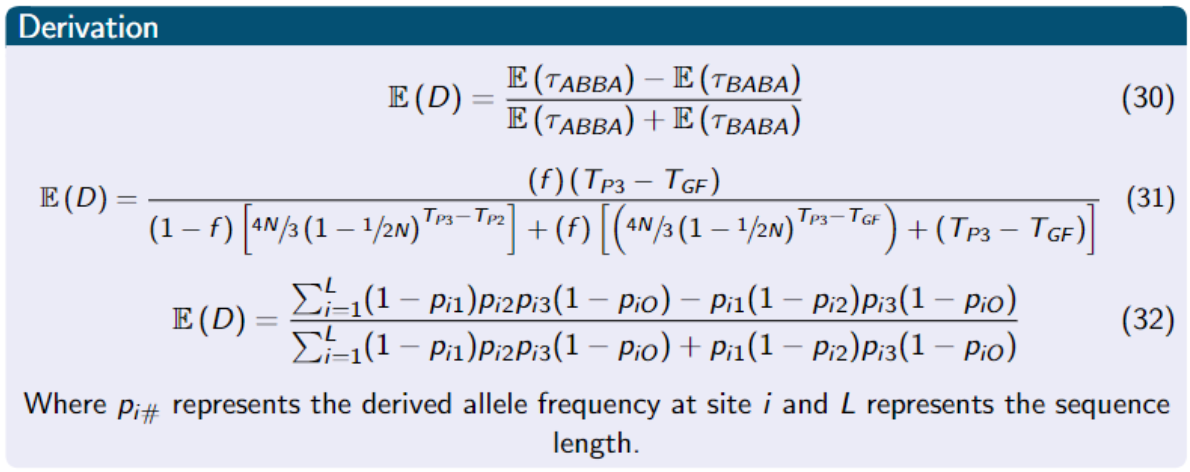
A general test will contain 3 individual from two different populations and 1 individual from an outgroup populations. From the paper, we will conduct two D-Statistic Test:
The following test will contain: 
- CACG, AHQT; M. nasutus, SLP (outgroup)
- DPRH, SLP; M. nasutus, AHQT (outgroup)
#### Steps For D-Statistic In Allele Frequency Data
1. First we need to extract the necessary data from the data frame and turn it into a genotype matrix

In [38]:
# Specify the needed data for D-Statistic Test
SLP_outgroup_data = geno_data[['AHQT1G','CAC6G', 'DPRN', 'SLP9G']]
AHQT_outgroup_data = geno_data[['SLP9G','DPRG', 'DPRN', 'AHQT1G']]
# Remove the uneccessary data within that data
SLP_outgroup_data = SLP_outgroup_data.dropna()
AHQT_outgroup_data = AHQT_outgroup_data.dropna()
# Change this into a genotype matrix given that it is already in its allele frequency matrix
SLP_outgroup_data = SLP_outgroup_data.to_numpy()
AHQT_outgroup_data = AHQT_outgroup_data.to_numpy()
# Display the new data
print(SLP_outgroup_data)
print(AHQT_outgroup_data)

[[0 0 0 0]
 [0 0 1 0]
 [0 0 0 0]
 ...
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 1]]
[[0 0 0 0]
 [0 0 1 0]
 [0 0 0 0]
 ...
 [1 1 1 0]
 [1 1 1 0]
 [1 1 1 0]]


2. Next we need to polarize our data becuase there is a very specific setup to the D-Statistic Test and we need to utilize the outgroup to normalize our test

In [39]:
# For a more concise code lets define the polarizing function here
def polarize_geno_mat(genotype_matrix):
    """
    ###########################################################################
    INPUT: Unpolarized genotype matrix with the following order:
           [P1, P2, P3, P4].
    ---------------------------------------------------------------------------
    OUTPUT: Polarized genotype matrix.
    ###########################################################################
    """
    # Define the lambda function.
    polarize = lambda x: abs(x - 1)
    # Polarize the genotype matrix such that the fourth taxon is always 0.
    polarized_genotype_list = [polarize(site) if site[-1] == 1 else site for site in genotype_matrix]
    # Convert the list to a numpy array.
    polarized_genotype_matrix = np.asarray(polarized_genotype_list)
    return polarized_genotype_matrix

In [40]:
polarized_SLP = polarize_geno_mat(SLP_outgroup_data)
print("Polarized SLP:",polarized_SLP)
polarized_AHQT = polarize_geno_mat(AHQT_outgroup_data)
print("Polarized AHQT:",polarized_AHQT)

Polarized SLP: [[0 0 0 0]
 [0 0 1 0]
 [0 0 0 0]
 ...
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]
Polarized AHQT: [[0 0 0 0]
 [0 0 1 0]
 [0 0 0 0]
 ...
 [1 1 1 0]
 [1 1 1 0]
 [1 1 1 0]]


3. After polarizing, we want to find the site patterns for what the ABBA and BABA patterns represents 

In [41]:
def site_patterns(p1, p2, p3):
    """
    INPUT: Takes in a genotype matrix and P1, P2, and P3 lineages
    OUTPUT: Should compute the ABBA and BABA site patterns for all scenarios of P1, P2, and P3
    """
    abba = ((1 - p1) * (p2) * (p3)).sum()
    baba = ((p1) * (1 - p2) * (p3)).sum()
    return abba, baba

In [42]:
ABBA_SLP, BABA_SLP = site_patterns(polarized_SLP[:,0], polarized_SLP[:, 1], polarized_SLP[:, 2])
ABBA_AHQT, BABA_AHQT = site_patterns(polarized_AHQT[:,0], polarized_AHQT[:, 1], polarized_AHQT[:, 2])
print("ABBA and BABA for SLP:", ABBA_SLP, BABA_SLP)
print("ABBA and BABA for AHQT:", ABBA_AHQT, BABA_AHQT)

ABBA and BABA for SLP: 1032 567
ABBA and BABA for AHQT: 966 832


4. We use the ABBA and BABA results to calculate the Patterson's D result

In [43]:
def pattersons_d(abba, baba):
    """
    INPUT: Takes in the result of ABBA and BABA from the site patterns of the allele matrix
    OUTPUT: Should compute the resulting Patterson's D from the inputs
    """
    d = ((abba - baba) / (abba + baba))
    return d

In [44]:
pattersons_SLP = pattersons_d(ABBA_SLP, BABA_SLP)
pattersons_AHQT = pattersons_d(ABBA_AHQT, BABA_AHQT)
print("Patterson's D for SLP:" , pattersons_SLP)
print("Patterson's D for AHQT:" , pattersons_AHQT)

Patterson's D for SLP: 0.29080675422138835
Patterson's D for AHQT: 0.07452725250278086


5. Lastly, we can visualize our data.

In [24]:
df = pd.DataFrame({
    "P1": ["AHQT1G", "SLP9G"],
    "P2": ["CAC6G", "DPRG"],
    "P3" : ["DPRN", "DPRN"],
    "Outgroup (P4)" : ["SLP9G", "AHQT1G"],
    "ABBA": ["1032", "966"],
    "BABA" : ["567", "832"],
    "Patterson's D" : ["0.2908", "0.0745"]
})
df.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index(["Northern", "Southern"], axis=0)

,P1,P2,P3,OUTGROUP (P4),ABBA,BABA,PATTERSON'S D
Northern,AHQT1G,CAC6G,DPRN,SLP9G,1032,567,0.2908
Southern,SLP9G,DPRG,DPRN,AHQT1G,966,832,0.0745


### Extractions
The next following cells will be extraction of the data to see what we can pull and utilize in order to perform a Principle Componenet Analysis and D-
Statistic Test. In short, these are things we can use for our interpretation as well.

In [14]:
# Prints out the shape of the geno_data
geno_data.shape

(14000, 19)

In [15]:
# Extract some information on the geno_data on what type of values do each cloumn hold and how many of them hold non-null and null value
# This can be useful when considering the NaN
geno_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NHN26     14000 non-null  int64  
 1   KootN     14000 non-null  int64  
 2   YJS6G     10007 non-null  float64
 3   AHQT1G    14000 non-null  int64  
 4   CAC9N     14000 non-null  int64  
 5   CAC6G     14000 non-null  int64  
 6   SF5N      11910 non-null  float64
 7   DUNG      13790 non-null  float64
 8   MAR3G     13532 non-null  float64
 9   BOG10G    10996 non-null  float64
 10  SWBG      10637 non-null  float64
 11  REM8G     9157 non-null   float64
 12  LMC24G    7937 non-null   float64
 13  SLP9G     14000 non-null  int64  
 14  DPRN      14000 non-null  int64  
 15  DPRG      14000 non-null  int64  
 16  PED5G     10036 non-null  float64
 17  IM62.JGI  13868 non-null  float64
 18  Mdent     9802 non-null   float64
dtypes: float64(11), int64(8)
memory usage: 2.0 MB


In [16]:
# Extract some information on some basic statistics of the data and how they compare different sample to a corresponding genotype.
geno_data.describe()

,NHN26,KootN,YJS6G,AHQT1G,CAC9N,CAC6G,SF5N,DUNG,MAR3G,BOG10G,SWBG,REM8G,LMC24G,SLP9G,DPRN,DPRG,PED5G,IM62.JGI,Mdent
count,14000.000000,14000.000000,10007.000000,14000.000000,14000.000000,14000.000000,11910.000000,13790.000000,13532.000000,10996.000000,10637.000000,9157.000000,7937.000000,14000.000000,14000.000000,14000.000000,10036.000000,13868.00000,9802.000000
mean,0.361786,0.362286,0.342061,0.332357,0.362714,0.350214,0.359194,0.415011,0.280594,0.329302,0.429632,0.450257,0.409223,0.439571,0.363429,0.442571,0.382722,0.01709,0.309121
std,0.480534,0.480678,0.474423,0.471075,0.480801,0.477054,0.479784,0.492742,0.449306,0.469981,0.495047,0.497547,0.491721,0.496353,0.481004,0.496709,0.486076,0.12961,0.462155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [17]:
# This calculates the correlation matrix for the data frame, showing how each column is related to every other column.
geno_data.corr()

,NHN26,KootN,YJS6G,AHQT1G,CAC9N,CAC6G,SF5N,DUNG,MAR3G,BOG10G,SWBG,REM8G,LMC24G,SLP9G,DPRN,DPRG,PED5G,IM62.JGI,Mdent
NHN26,1.000000,0.876142,0.129699,0.062990,0.857933,0.279877,0.856787,0.161396,0.054919,0.111403,0.187054,0.236425,0.261899,0.312244,0.855216,0.340692,0.252495,0.008186,0.311150
KootN,0.876142,1.000000,0.142500,0.066970,0.876365,0.288687,0.894348,0.162064,0.050183,0.112683,0.187337,0.239842,0.265115,0.303145,0.880436,0.337270,0.249801,-0.002309,0.301191
YJS6G,0.129699,0.142500,1.000000,0.235996,0.136662,0.153661,0.128797,0.077074,0.137377,0.218677,0.067400,0.028765,0.067129,0.077640,0.138415,0.048660,0.139534,0.017841,0.198449
AHQT1G,0.062990,0.066970,0.235996,1.000000,0.059070,0.189911,0.057328,0.039159,0.231293,0.190252,-0.009304,-0.036817,-0.032588,-0.008654,0.058627,-0.015657,0.065384,0.015525,0.150847
CAC9N,0.857933,0.876365,0.136662,0.059070,1.000000,0.300105,0.898560,0.152712,0.049247,0.104775,0.179064,0.231998,0.267850,0.310360,0.884480,0.335493,0.243925,0.002161,0.303818
CAC6G,0.279877,0.288687,0.153661,0.189911,0.300105,1.000000,0.291938,0.020106,0.186547,0.157142,0.012379,0.022791,0.055112,0.060571,0.279898,0.083527,0.079980,-0.004809,0.165111
SF5N,0.856787,0.894348,0.128797,0.057328,0.898560,0.291938,1.000000,0.165697,0.052161,0.107842,0.193266,0.241661,0.265471,0.294776,0.880857,0.331445,0.245870,-0.008293,0.306996
DUNG,0.161396,0.162064,0.077074,0.039159,0.152712,0.020106,0.165697,1.000000,0.050627,0.060148,0.416374,0.147502,0.174715,0.085132,0.158374,0.063735,0.116442,-0.007741,0.177934
MAR3G,0.054919,0.050183,0.137377,0.231293,0.049247,0.186547,0.052161,0.050627,1.000000,0.176698,-0.017011,-0.038748,-0.032680,-0.029254,0.043781,-0.034273,0.040019,0.032132,0.129472
BOG10G,0.111403,0.112683,0.218677,0.190252,0.104775,0.157142,0.107842,0.060148,0.176698,1.000000,0.049682,0.023184,0.037568,0.056593,0.113131,0.048433,0.147324,0.012555,0.184859


### Alternative Way
The following cells will compute the Pinciple Component Anaylsis

          PC1        PC2
0  -20.029467 -10.522403
1  -20.447699 -11.095460
2   11.163935  -2.247321
3   26.698574 -11.429743
4  -20.517336 -11.257953
5    9.653242 -15.870972
6  -17.407307  -9.566869
7    9.545641  25.476257
8   25.684629 -12.257061
9   13.900791  -3.538109
10   3.320619  20.086351
11  -1.523603  12.265901
12  -1.468482   8.163400
13  -8.140152  19.773980
14 -20.529938 -10.808748
15 -10.102131  17.263674
16   2.113461   4.585658
17  18.085225  -9.020582


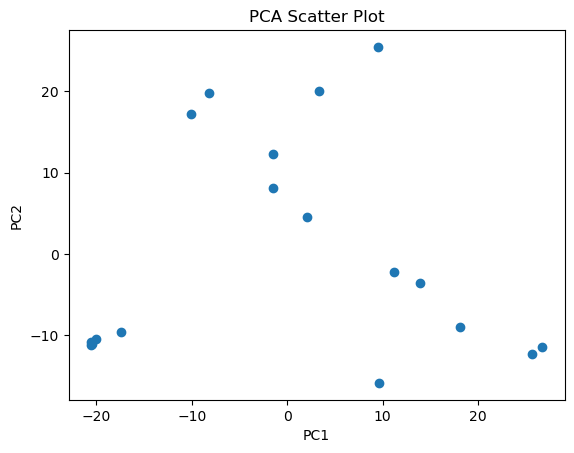

In [23]:
import pandas as pd
from sklearn.decomposition import PCA

# Create a sample dataframe
df = pd.DataFrame(m_matrix)

# Create a PCA object
pca = PCA(n_components=2)

# Fit and transform the data
pca_data = pca.fit_transform(df)

# Convert the PCA output to a dataframe
pca_df = pd.DataFrame(data = pca_data, columns = ['PC1', 'PC2'])

# Print the output
print(pca_df)

# Plot the data using Matplotlib
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.show()

### Interpretation
In general, we are comparing two populations, Mimulus Guttatus and Mimulus Nasutus. Here the Mimulus Nasutus are selfing meaning they polleniate and reproduce asexually. This limits the share of genetic information and diversity.

#### PCA 
From PCA, we are able to observe the variation of two different populations. One selfing population, Mimulus Nasutus, and another population, Mimulus Guttatus which is sepearted among two groups, northern and southern. Here the PCA reveals the most varaiational components among these population. An interpretatable PCA should reveal clustering among a certain population, and our PCA does just that. From both components, PC1 and PC2, we see that the Mimulus Nasutus are very clustered which makes sense because there should be low variation among them given they are selfing. On the other hand, the two different regions, southern and northern are also well represented where they are left bottom and right top. This is a direct contrast where they are indeed seperated from the perspective of both PC1 and PC2. This means that there must be a environmental factor that leads to the greatest variation among these populations.  





#### D - Statistics 
From the D-Statistic and the classification of these samples: 

##### Northern
AHQT (Allopatric Nothern Mimulus Guttatus)

CACG (Sympatric Northern Mimulus Guttatus)

DPRN (Sympatric Mimulus Nasutus) 

SLP (Allopatric Southern Mimulus Guttatus)


##### Southern
SLP (Allopatric Southern Mimulus Guttatus) 

DPRG (Sympatric Southern Mimulus Guttatus)

DPRN (Sympatric Mimulus Nasutus)

AHQT (Allopatric Nothern Mimulus Guttatus)

We know that a positive D-Statistic reveals that there is a genetic share of material among two species and even perhaps gene flow. And given the previous information where one popualtion is selfing, the direction of genetic share should be unidirectional where Mimulus Guttatus contributes to the Mimulus Nastus. The results also reinforces that sympatry plays an essential role as both popualtion are close in proximity, which permits the event of introgression or genetic share as shown where there was introgression among sympatric population instead of allopatric population.